In [154]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [155]:
df = pd.read_pickle('cicids2017_final.pkl')

In [156]:
delete_index = np.load('delete_index.npy')

In [157]:
len(delete_index)

17972

In [158]:
len(delete_index)

17972

In [44]:
df2 = df.copy()

In [45]:
df = df.drop(index=delete_index )

In [46]:
df.reset_index(drop=True, inplace=True)

In [159]:
df = df.dropna()

In [160]:
len(df)

87390

In [161]:
x = df.drop(columns=[' Label', 'Flow ID',' Source IP',' Source Port', ' Destination IP', ' Destination Port',' Timestamp'])

In [162]:
x = x.replace(['Infinity','infinity ','inf', '-inf','INF','NaN','nan'], 0)

In [163]:
x_new = mms.fit_transform(x)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [53]:
label = df[' Label']

In [54]:
Counter(label)

Counter({0: 8651,
         3: 1966,
         1: 4173,
         10: 9679,
         9: 9898,
         8: 5492,
         7: 5792,
         5: 7931,
         11: 11,
         4: 35,
         2: 9953,
         6: 5883})

## 建图

In [55]:
src_ip = df[' Source IP']
dst_ip = df[' Destination IP']
src_port = df[' Source Port']
dst_port = df[' Destination Port']

In [56]:
src_ip = np.array(src_ip)
dst_ip = np.array(dst_ip)
src_port = np.array(src_port)
dst_port = np.array(dst_port)

In [57]:
src_nodes = list(zip(src_ip, src_port))
dst_nodes = list(zip(dst_ip, dst_port))

In [58]:
socket_dict1 = list(zip(src_nodes, dst_nodes))
socket_dict2 = list(zip(dst_nodes, src_nodes))
socket_dict_n = set(socket_dict1) & set(socket_dict2)

In [59]:
num_edge = len(src_nodes)
num_edge

69464

In [60]:
all_nodes = set(src_nodes).union(set(dst_nodes))

In [61]:
nodes_to_no_dict = dict()
for index,value in enumerate(all_nodes):
    nodes_to_no_dict[value] = index

In [62]:
socket_adj_map = {}
socket_no_map = {}
for index, value in enumerate(socket_dict1):
    # 获取发出者编号
    s, d = value[0], value[1]
    s_no = nodes_to_no_dict[s]
    d_no = nodes_to_no_dict[d]
    if s_no not in socket_adj_map:
        socket_adj_map[s_no] = []
    if s_no not in socket_no_map:
        socket_no_map[s_no] = []
    socket_adj_map[s_no].append(d_no)
    socket_no_map[s_no].append(index)

In [63]:
socket_adj_map_reverse = {}
socket_no_map_reverse = {}
for index, value in enumerate(socket_dict2):
    # 获取发出者编号
    s, d = value[0], value[1]
    s_no = nodes_to_no_dict[s]
    d_no = nodes_to_no_dict[d]
    if s_no not in socket_adj_map_reverse:
        socket_adj_map_reverse[s_no] = []
    if s_no not in socket_no_map_reverse:
        socket_no_map_reverse[s_no] = []
    socket_adj_map_reverse[s_no].append(d_no)
    socket_no_map_reverse[s_no].append(index)

In [64]:
adj_list = {}

In [65]:
def build_edge_index(arr):
    for i in range(len(arr)):
        if arr[i] not in adj_list:
            adj_list[arr[i]] = set()
        for j in range(len(arr)):
            if i != j:
                adj_list[arr[i]].add(arr[j])
        

In [66]:
for index, value in socket_no_map.items():
    build_edge_index(value)

In [67]:
for key, value in socket_adj_map.items():
    for i in range(len(value)):
        adj_no = value[i]
        no = socket_no_map[key][i]
        if adj_no in socket_adj_map and len(socket_adj_map[adj_no]) != 0:
            for adj_v in socket_adj_map[adj_no]:
                adj_list[no].add(adj_v)
                adj_list[adj_v].add(no)
        
        


In [68]:
adj_list

{0: {462},
 462: {0},
 1: {881, 7245, 15838},
 2: set(),
 3: {321,
  395,
  427,
  496,
  518,
  716,
  723,
  738,
  749,
  931,
  957,
  1073,
  1195,
  1240,
  1489,
  1568,
  1578,
  1589,
  1785,
  1793,
  1905,
  1910,
  1926,
  2137,
  2147,
  2445,
  2456,
  2533,
  2712,
  2872,
  3041,
  3152,
  3428,
  3590,
  3678,
  4014,
  4025,
  4128,
  4173,
  4194,
  4213,
  4436,
  4503,
  4619,
  4650,
  4670,
  4797,
  4815,
  4823,
  4906,
  4946,
  5054,
  5177,
  5306,
  5508,
  5810,
  5852,
  6063,
  6123,
  6217,
  6242,
  6366,
  6786,
  6848,
  6874,
  6940,
  6991,
  7120,
  7211,
  7296,
  7332,
  7338,
  7568,
  7635,
  7663,
  7910,
  7956,
  8181,
  8389,
  8413,
  8594},
 321: {3,
  395,
  427,
  496,
  518,
  716,
  723,
  738,
  749,
  931,
  957,
  1073,
  1195,
  1240,
  1489,
  1568,
  1578,
  1589,
  1785,
  1793,
  1905,
  1910,
  1926,
  2137,
  2147,
  2445,
  2456,
  2533,
  2712,
  2872,
  3041,
  3152,
  3428,
  3590,
  3678,
  4014,
  4025,
  4128,
  4173

In [70]:
count_arr = []
for key, v in adj_list.items():
    count_arr.append(len(v))
count_arr

[1,
 1,
 3,
 0,
 81,
 83,
 1356,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 82,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 114,
 81,
 83,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 1356,
 81,
 81,
 81,
 92,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 118,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 82,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 4,
 1276,
 1,
 1,
 3,
 3,
 3,
 3,
 54,
 1,
 4,
 3,
 3,
 15,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 705,
 4,
 2,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 3,
 3,
 3,
 3,
 15,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 7,
 3,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 55,
 54,
 48,
 48,
 48,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 6,
 1,
 24,
 0,
 24,
 2,
 0,
 12,
 706,
 49,
 1,
 1,
 2,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 26

In [72]:
import networkx as nx

In [73]:
G = nx.from_dict_of_lists(adj_list)

In [74]:
G

In [79]:
# np.save('adj_list', adj_list)

In [80]:
h = nx.is_connected(G)

In [81]:
h

False

False
14517
14517


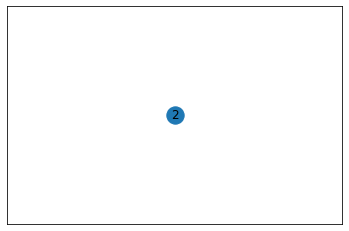

In [86]:
print(nx.is_connected(G))

print(nx.number_connected_components(G))
subgraph = list(G.subgraph(c) for c in nx.connected_components(G))
print(len(subgraph))
min_subgraph = nx.number_of_edges(G) + 1
g = None
for s in subgraph:
    if min_subgraph > len(s):
        min_subgraph = len(s)
        g = s
nx.draw_networkx(g, with_labels=True)

In [87]:
nx.number_of_edges(G)

1457953

In [93]:
from torch_geometric.utils import from_networkx

In [94]:
data = from_networkx(G)

In [96]:
data.edge_index

tensor([[    0,     1,     2,  ..., 69461, 69462, 69463],
        [    1,     0,  2494,  ..., 69460, 69463, 69462]])

In [97]:
data.num_nodes

69464

In [98]:
data.num_edges

2915867

In [100]:
len(label)

69464

In [101]:
data.y = label

In [102]:
data.x = features

In [105]:
features.to_csv('features.csv', index=False, header=None)

In [106]:
pd.DataFrame([label]).to_csv('label.csv', index=False, header=None)